# HR Dataset - Predicting Employee Retention

* We're starting by creating a new DataFrame from the copied data, keeping the original data.

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('../datasets/hr.csv')
# creating a new DataFrame, keeping the original data
df = pd.DataFrame(data.copy())
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Dataset Description - Exploring the dataset
## We're starting to gain some insights about the data especially the data types of the columns

In [2]:
print(f"Shape of dataset: {df.shape}")
print("Columns in the dataset:")
print(df.info())

Shape of dataset: (311, 36)
Columns in the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null

# Visualizations

## Now, we start to familiarize the readers with the dataset through some informative statistics and charts.

## Starting with the termination reasons distribution.


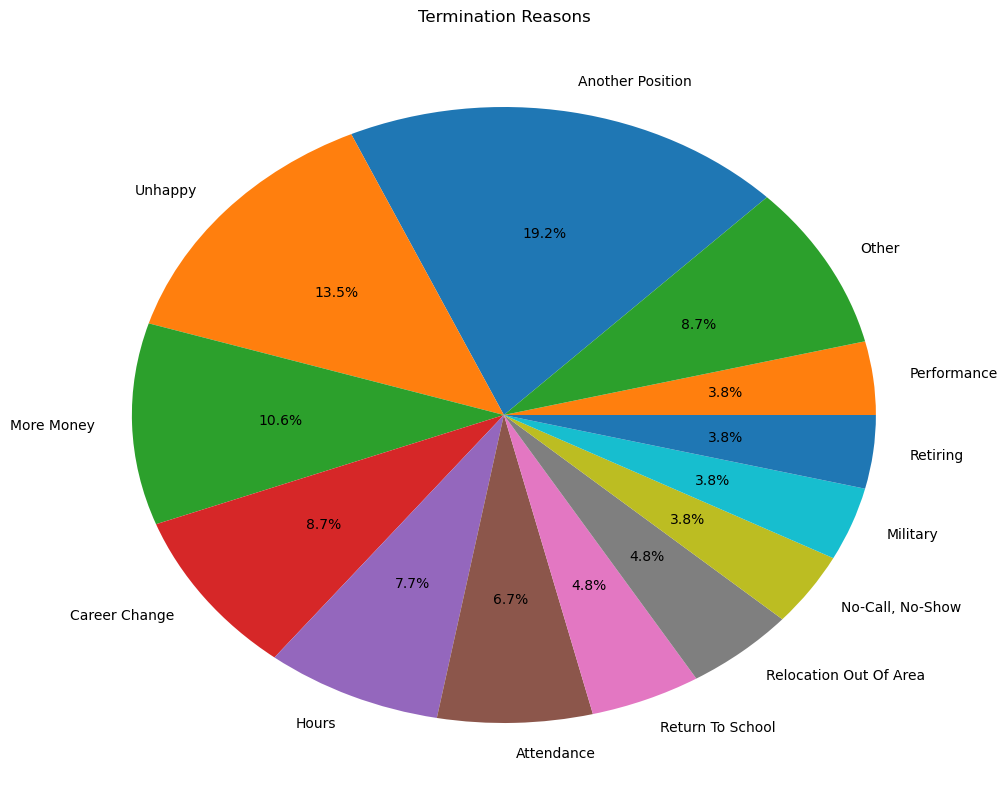

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# excluding "Still Employed" from the TermReason column for clearer visualization
turnover_reasons = df['TermReason'].value_counts()
turnover_reasons = turnover_reasons[turnover_reasons.index != 'N/A-StillEmployed']

total = turnover_reasons.sum()
percentages = (turnover_reasons / total) * 100

# grouping categories with less than 3% into "Other" for better visualization
filtered_reasons = percentages[percentages >= 3]
filtered_reasons['Other'] = percentages[percentages < 3].sum()

filtered_reasons.index = filtered_reasons.index.str.title()

plt.figure(figsize=(12, 10))
ax = filtered_reasons.plot.pie(autopct='%1.1f%%', startangle=45,)
ax.set_aspect('auto')
plt.title('Termination Reasons')
plt.ylabel('')
plt.show()

# Performance by Departments

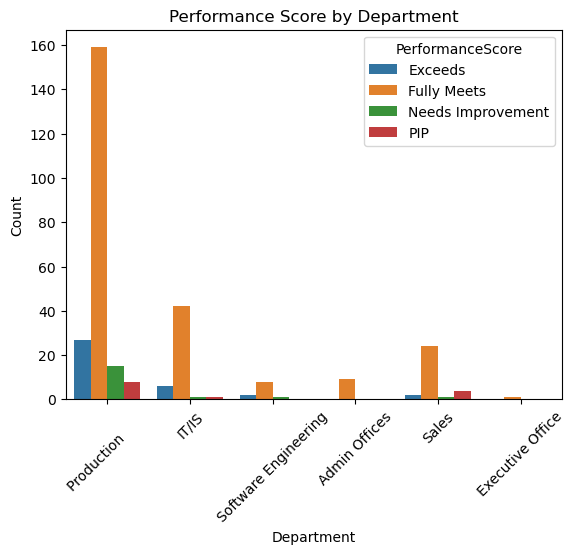

In [13]:
sns.countplot(x='Department', hue='PerformanceScore', data=df)
plt.title('Performance Score by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Termination counts by department

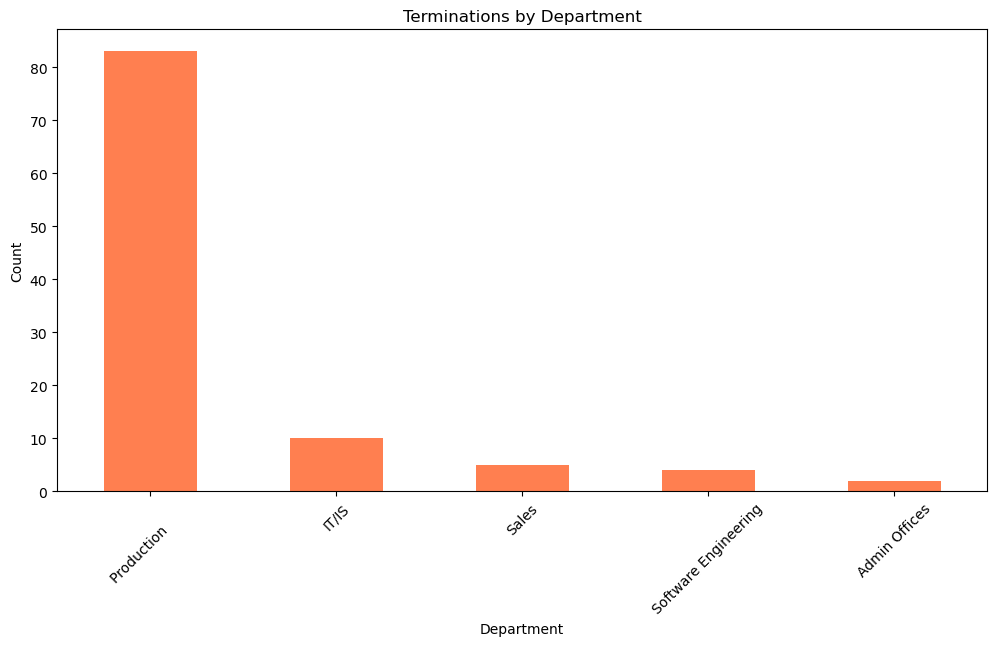

In [53]:
department_termination = df[df['Termd'] == 1]['Department'].value_counts()

plt.figure(figsize=(12, 6))
department_termination.plot(kind='bar', color='coral')
plt.title('Terminations by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Employee distribution by department

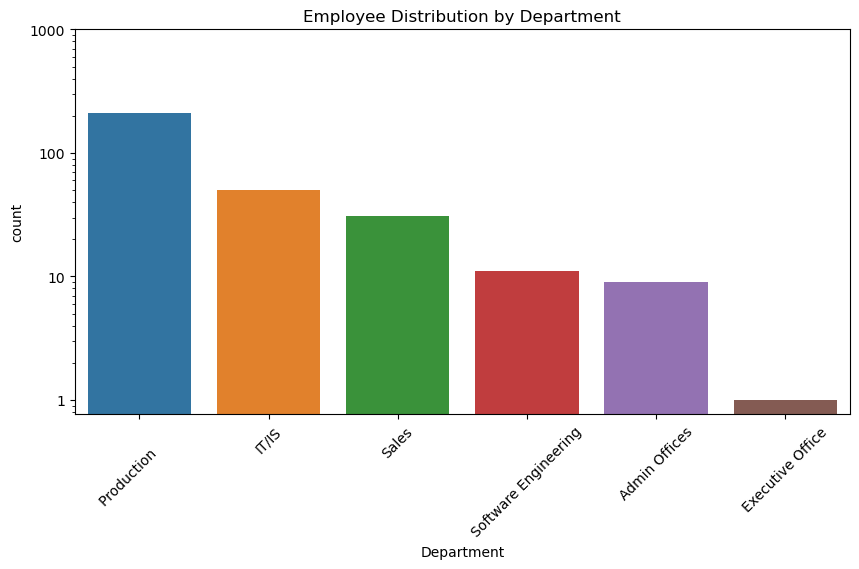

In [54]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Department', data=df, order=df['Department'].value_counts().index)
plt.yscale('log') # Thanks to logarithmic scale, we can see the distribution of employees clearer even in the departments with fewer employees
log_ticks = [1, 10, 100, 1000]
plt.yticks(log_ticks, [str(tick) for tick in log_ticks])

plt.title('Employee Distribution by Department')
plt.xticks(rotation=45)
plt.show()

# Termination rate by manager

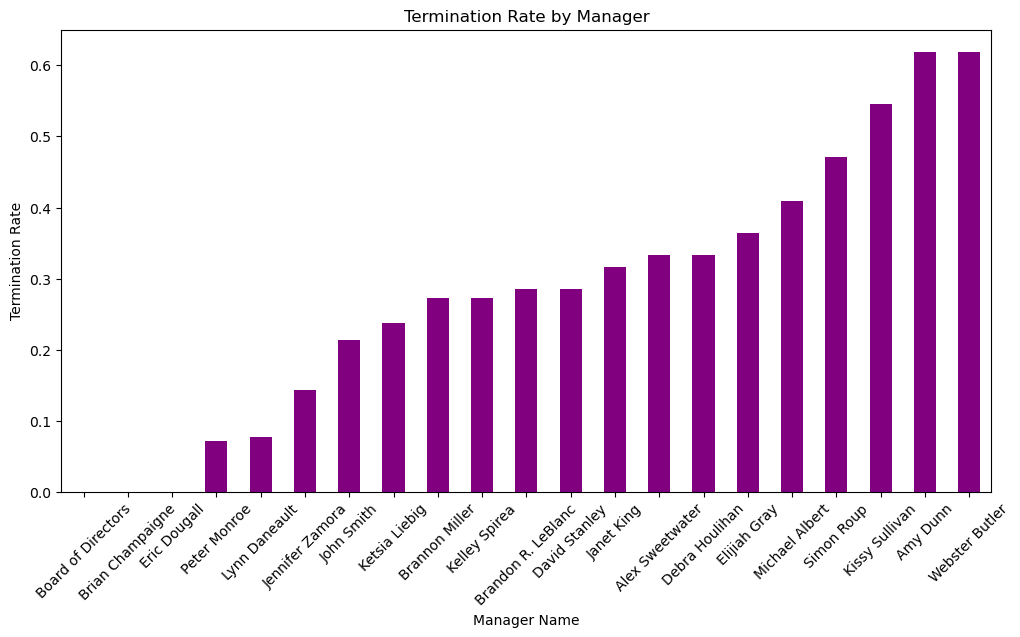

In [55]:
manager_termination_rate = df.groupby('ManagerName')['Termd'].mean().sort_values()

plt.figure(figsize=(12, 6))
manager_termination_rate.plot(kind='bar', color='purple')
plt.title('Termination Rate by Manager')
plt.xlabel('Manager Name')
plt.ylabel('Termination Rate')
plt.xticks(rotation=45)
plt.show()

# Performance Score by Sex

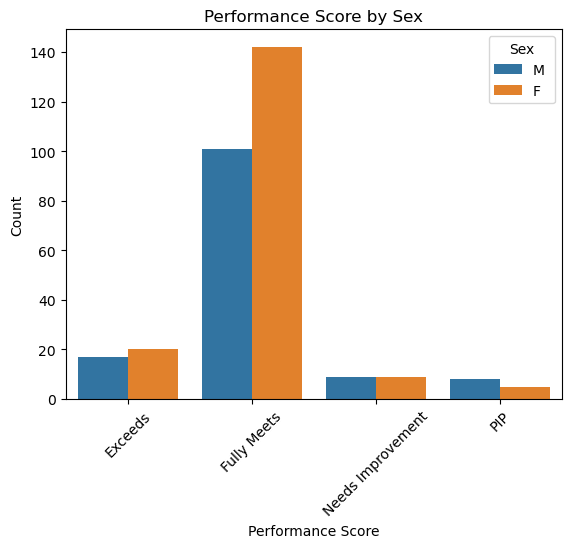

In [56]:
sns.countplot(x='PerformanceScore', hue='Sex', data=df)
plt.title('Performance Score by Sex')
plt.xlabel('Performance Score')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Termination count by gender

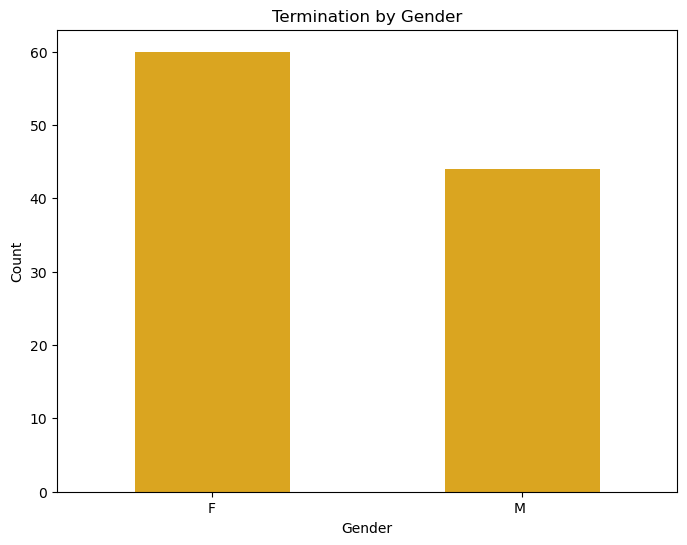

In [57]:
gender_termination = df[df['Termd'] == 1]['Sex'].value_counts()

plt.figure(figsize=(8, 6))
gender_termination.plot(kind='bar', color='goldenrod')
plt.title('Termination by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


# Grouping by Department and calculating average salary

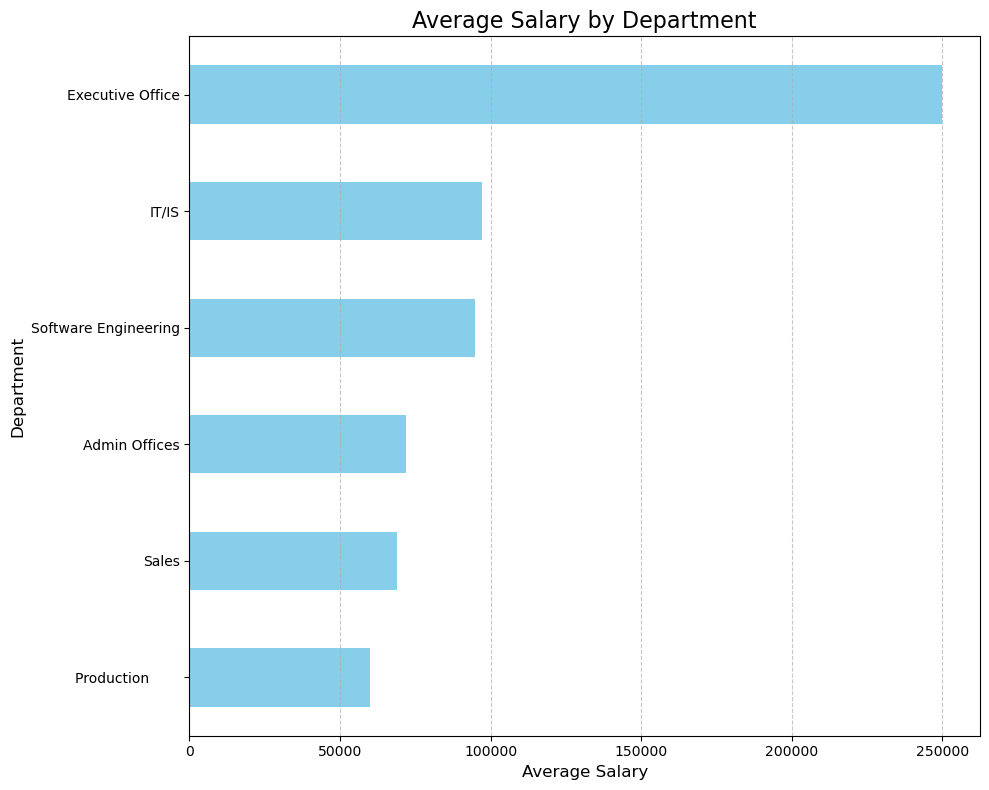

In [58]:
avg_salary_by_department = df.groupby('Department')['Salary'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 8))
avg_salary_by_department.plot(kind='barh', color='skyblue')
plt.title('Average Salary by Department', fontsize=16)
plt.xlabel('Average Salary', fontsize=12)
plt.ylabel('Department', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Data Preprocessing - Data Cleaning

In [14]:
import datetime

# We're checking for missing values before the cleaning process
print("Missing values per column before cleaning:")
print(df.isnull().sum())

current_date = datetime.datetime.now()
df['DateofHire'] = pd.to_datetime(df['DateofHire'])
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'], errors='coerce')

# Creating additional features out of our dataset which we believe can be really effective in the process of predicting the employee retention.
# Creating TenureInYears column
# We initally calculated this via DateofTermination - DateofHire formula but it resulted in data leakage problems since DateofTermination exactly shows the termination date.
# Accurracy was quite high but it was not realistic and we couldnt use it in real life insights.
# So we decided to calculate it via current date - DateofHire formula.
df['TenureInYears'] = (current_date - df['DateofHire']).dt.days / 365.25
df['Age'] = (pd.Timestamp.now() - pd.to_datetime(df['DOB'])).dt.days / 365.25

# Dropping irrelevant ID-related columns
# There are a plenty of ID columns that dont have any meaningful contribution to our model and the prediction.
# Some of them are MarriedID, MarialStatusID, DeptID and so on and so forth. Here we're dropping them.
id_columns = [col for col in df.columns if col.endswith('ID')]

# Also there's a column named 'Hispanic Latino' which includes boolean 'Yes' and 'No' values. We believe that this column also should be dropped since it doesnt actually provide insight for model.
hispanic_latino = ['HispanicLatino']
columns_to_drop = id_columns + hispanic_latino

df_prod = df.drop(columns=columns_to_drop)

# Displaying remaining columns
print("Remaining columns after dropping ID-related columns:")
print(len(df_prod.columns))

Missing values per column before cleaning:
Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
Recru

/var/folders/yg/qk24xr512h986wtdxdz5v6y00000gn/T/ipykernel_8003/2174970188.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Age'] = (pd.Timestamp.now() - pd.to_datetime(df['DOB'])).dt.days / 365.25


In [15]:
# We see a large number of missing values in 'DateofTermination' column due to employees who are still employed
df_prod['DateofTermination'] = df_prod['DateofTermination'].fillna(0)

print("Missing values per column after filling DateofTermination with 0:")
print(df_prod.isnull().sum())

Missing values per column after filling DateofTermination with 0:
Employee_Name                 0
Salary                        0
Termd                         0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatisfaction               0
SpecialProjectsCount          0
LastPerformanceReview_Date    0
DaysLateLast30                0
Absences                      0
TenureInYears                 0
Age                           0
dtype: int64


# Correlation HeatMap

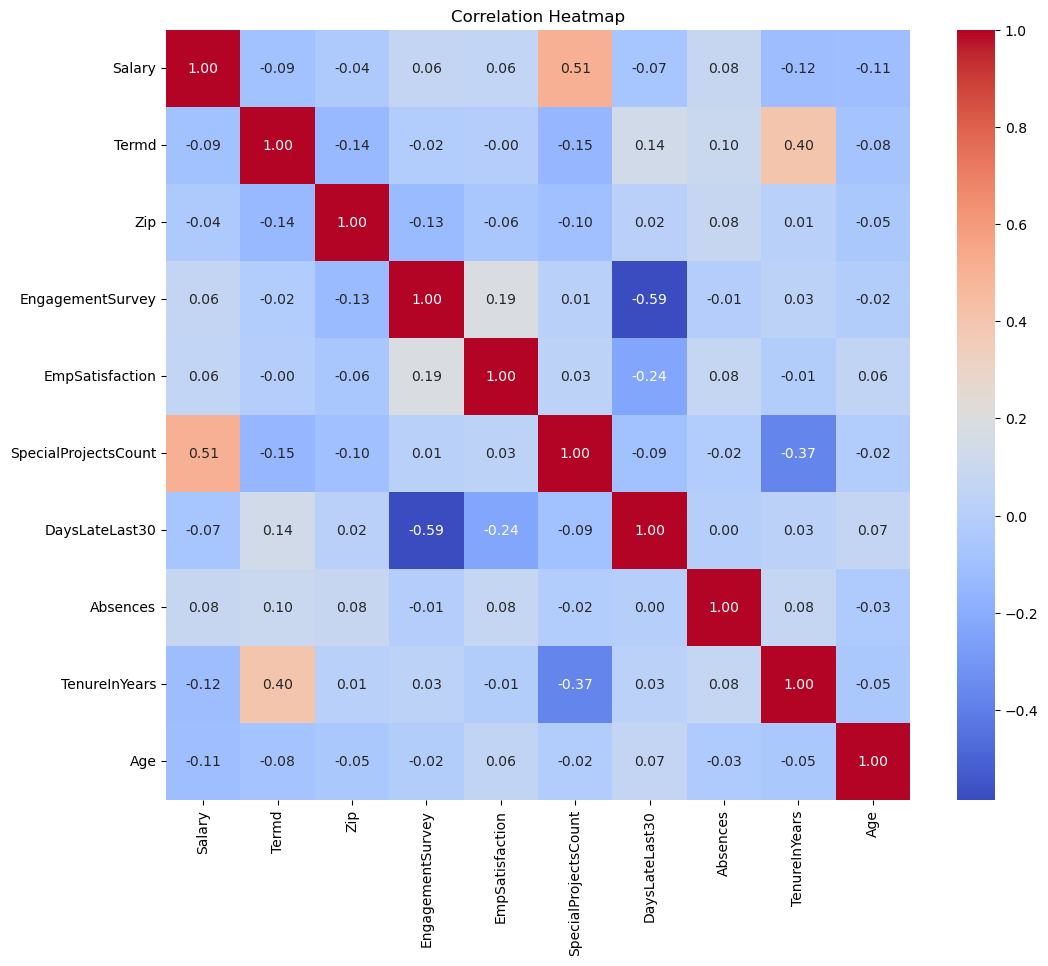

In [16]:
correlation_matrix = df_prod.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Data Transformation
### One-hot / Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Ordinal data label encoding
# To avoid possible ranking problems, we'll use LabelEncoder for ordinal data and one-hot encoding for nominal data in the feature list.
ordinal_feature_columns = ['PerformanceScore']

# For nominal datas we'll use one-hot encoding. Because, using label-encoder for them may result in ranking problems even in classification models.
# List of categorical feature columns
nominal_feature_columns = ['Department', 'Position', 'ManagerName', 'Sex', 'CitizenDesc', 'RaceDesc', 'RecruitmentSource']

label_encoders = {}
for col in ordinal_feature_columns:
    le = LabelEncoder()
    df_prod[col] = le.fit_transform(df_prod[col])
    label_encoders[col] = le

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
encoded_data = encoder.fit_transform(df_prod[nominal_feature_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(nominal_feature_columns))

df_prod = pd.concat([df_prod, encoded_df], axis=1)
df_prod.drop(columns=nominal_feature_columns, inplace=True)

print(df_prod.head())

              Employee_Name  Salary  Termd State   Zip       DOB MaritalDesc  \
0       Adinolfi, Wilson  K   62506      0    MA  1960  07/10/83      Single   
1  Ait Sidi, Karthikeyan     104437      1    MA  2148  05/05/75     Married   
2         Akinkuolie, Sarah   64955      1    MA  1810  09/19/88     Married   
3              Alagbe,Trina   64991      0    MA  1886  09/27/88     Married   
4          Anderson, Carol    50825      1    MA  2169  09/08/89    Divorced   

  DateofHire    DateofTermination         TermReason  ...  \
0 2011-07-05                    0  N/A-StillEmployed  ...   
1 2015-03-30  2016-06-16 00:00:00      career change  ...   
2 2011-07-05  2012-09-24 00:00:00              hours  ...   
3 2008-01-07                    0  N/A-StillEmployed  ...   
4 2011-07-11  2016-09-06 00:00:00   return to school  ...   

  RaceDesc_Two or more races  RaceDesc_White  \
0                        0.0             1.0   
1                        0.0             1.0   
2       

In [18]:
df_prod.head()

,Employee_Name,Salary,Termd,State,Zip,DOB,MaritalDesc,DateofHire,DateofTermination,TermReason,...,RaceDesc_Two or more races,RaceDesc_White,RecruitmentSource_Diversity Job Fair,RecruitmentSource_Employee Referral,RecruitmentSource_Google Search,RecruitmentSource_Indeed,RecruitmentSource_LinkedIn,RecruitmentSource_On-line Web application,RecruitmentSource_Other,RecruitmentSource_Website
0,"Adinolfi, Wilson K",62506,0,MA,1960,07/10/83,Single,2011-07-05,0,N/A-StillEmployed,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,"Ait Sidi, Karthikeyan",104437,1,MA,2148,05/05/75,Married,2015-03-30,2016-06-16 00:00:00,career change,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,"Akinkuolie, Sarah",64955,1,MA,1810,09/19/88,Married,2011-07-05,2012-09-24 00:00:00,hours,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,"Alagbe,Trina",64991,0,MA,1886,09/27/88,Married,2008-01-07,0,N/A-StillEmployed,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,"Anderson, Carol",50825,1,MA,2169,09/08/89,Divorced,2011-07-11,2016-09-06 00:00:00,return to school,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Feature Engineering

In [19]:
# After cleaning and transforming the data as a last step we'll also do data reduction before we move on with ML inference section.
from sklearn.model_selection import train_test_split, cross_val_score

# Our target variable is 'Termd' since our main goal is to predict employee retention. And it's indicating whether the employee left or not with ones and zeros.
target = 'Termd'

# Termination reason and Termination type features should not be used for training the model because these features are results. They're not predictors.
# In base_features list we only included the non-categorical columns since earlier we one-hot encoded some categorical variables and will include them later.
base_features = ['Salary', 'EngagementSurvey', 'EmpSatisfaction', 'PerformanceScore', 'Age', 'TenureInYears']

# since one-hot encoded features start with ColumnName_<CategoryName1>, ColumnName_<CategoryName2>
# This kind of filtering logic makes sense.
onehot_features = [col for col in df_prod.columns if any(col.startswith(nom) for nom in nominal_feature_columns)]
features = base_features + onehot_features

print(features)

# Splitting features and target
X = df_prod[features]
y = df_prod[target]

# Splitting the dataset into training, validation, and testing sets.
# In this way we can detect possible overfitting, underfitting situations.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

['Salary', 'EngagementSurvey', 'EmpSatisfaction', 'PerformanceScore', 'Age', 'TenureInYears', 'Department_Executive Office', 'Department_IT/IS', 'Department_Production       ', 'Department_Sales', 'Department_Software Engineering', 'Position_Administrative Assistant', 'Position_Area Sales Manager', 'Position_BI Developer', 'Position_BI Director', 'Position_CIO', 'Position_Data Analyst', 'Position_Data Analyst ', 'Position_Data Architect', 'Position_Database Administrator', 'Position_Director of Operations', 'Position_Director of Sales', 'Position_Enterprise Architect', 'Position_IT Director', 'Position_IT Manager - DB', 'Position_IT Manager - Infra', 'Position_IT Manager - Support', 'Position_IT Support', 'Position_Network Engineer', 'Position_President & CEO', 'Position_Principal Data Architect', 'Position_Production Manager', 'Position_Production Technician I', 'Position_Production Technician II', 'Position_Sales Manager', 'Position_Senior BI Developer', 'Position_Shared Services Man

In [65]:
print(f"Total features: {X.shape[1]}")
print(f"Total samples: {X.shape[0]}")

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Testing set: {X_test.shape}")

Total features: 78
Total samples: 311
Training set: (186, 78)
Validation set: (62, 78)
Testing set: (63, 78)


# Creating Principal Component Analysis variables


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the cleaned features (fit on training set, apply to all sets)
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Transforming the validation and test sets
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Applying PCA (fit on training set, apply to all sets)
pca = PCA(n_components=0.90)  # Retaining 90% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Explained variance ratio to understand how much variance is retained
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance_ratio}")
print(f"Number of components selected: {pca.n_components_}")

# Here we're transforming the PCA result back into a DataFrame for better interpretability
pca_columns = [f'PC{i+1}' for i in range(X_train_pca.shape[1])]
X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_columns)
X_val_pca_df = pd.DataFrame(X_val_pca, columns=pca_columns)
X_test_pca_df = pd.DataFrame(X_test_pca, columns=pca_columns)

print(X_train_pca_df.head())

Explained variance ratio: [0.07296346 0.05320818 0.05131891 0.0478762  0.03833409 0.03776265
 0.0356315  0.03384253 0.03314459 0.03226538 0.02995281 0.02641461
 0.02636718 0.02447686 0.02280418 0.02212896 0.02064801 0.02021275
 0.01953619 0.0188179  0.01855274 0.01835282 0.01673943 0.01642652
 0.01617998 0.01591767 0.01568036 0.01560005 0.01539277 0.01473369
 0.01433257 0.01397119 0.01361911 0.01266637 0.01228193 0.01174723]
Number of components selected: 36
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.291040 -3.949691 -0.282762 -1.038048  0.580281  3.083432 -0.811608   
1  0.714373 -0.218574  0.589122 -1.044463  0.972703 -0.396223  0.263159   
2  1.103524 -0.883983  0.461997 -0.662763 -0.161167  0.372169  0.241003   
3 -0.218325  1.972356  0.199020  2.933608  1.273269 -1.167967  4.339950   
4  1.209947  0.192214  0.217975 -0.958737  0.386699  0.424354 -0.040320   

        PC8       PC9      PC10  ...      PC27      PC28      PC29      PC30  \
0  2.4

# MACHINE LEARNING IN ACTION

## Neural Network with the PCA

In [65]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Here we're building the neural network model with sigmoid activation in hidden layers.
# Using sigmoid function since we're dealing with the ones and zeros in our target variable and so on.
def build_nn_pca():
    model = Sequential([
        Dense(64, activation="relu", input_shape=(X_train_pca.shape[1],)),
        Dense(32, activation="relu"),
        Dense(1, activation="sigmoid")  # Since binary classification is key for our model, we're using sigmoid activation in the output layer.
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Training the NN Model
nn_model_pca = build_nn_pca()
nn_model_pca.fit(X_train_pca, y_train, epochs=20, batch_size=32, validation_data=(X_val_pca, y_val))

# Evaluating NN Model
nn_loss_pca, nn_acc_pca = nn_model_pca.evaluate(X_test_pca_df, y_test)
print(f"NN Test Accuracy: {nn_acc_pca:.4f}")

Epoch 1/20


/Users/semihozturk/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4369 - loss: 0.8618 - val_accuracy: 0.5161 - val_loss: 0.7152
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5716 - loss: 0.6762 - val_accuracy: 0.6774 - val_loss: 0.6274
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7205 - loss: 0.6106 - val_accuracy: 0.7419 - val_loss: 0.5895
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7352 - loss: 0.5814 - val_accuracy: 0.7419 - val_loss: 0.5718
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6944 - loss: 0.5878 - val_accuracy: 0.7581 - val_loss: 0.5644
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7390 - loss: 0.5309 - val_accuracy: 0.7742 - val_loss: 0.5606
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8416 - loss: 0.4590 - val_accuracy: 0.7903 - val_loss: 0.5583
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7876 - loss: 0.4912 - val_accuracy: 0.7419 - val_loss: 0.5600
Epoch 9/20
6/6 ━━━

# XgBoost with the PCA

In [77]:
import xgboost as xgb

# Training the XGBoost Model
xgb_model_pca = xgb.XGBClassifier(random_state=42, n_estimators=200, max_depth=6, learning_rate=0.1)
xgb_model_pca.fit(X_train_pca, y_train)

# Evaluating the XGBoost
xgb_preds_pca = xgb_model_pca.predict(X_test_pca_df) # X_test-pca_df
xgb_acc_pca = accuracy_score(y_test, xgb_preds_pca)
print(f"XGBoost Test Accuracy: {xgb_acc_pca:.4f}")

XGBoost Test Accuracy: 0.7302


# Decision Tree with the PCA

Decision Tree Test Accuracy: 0.6984


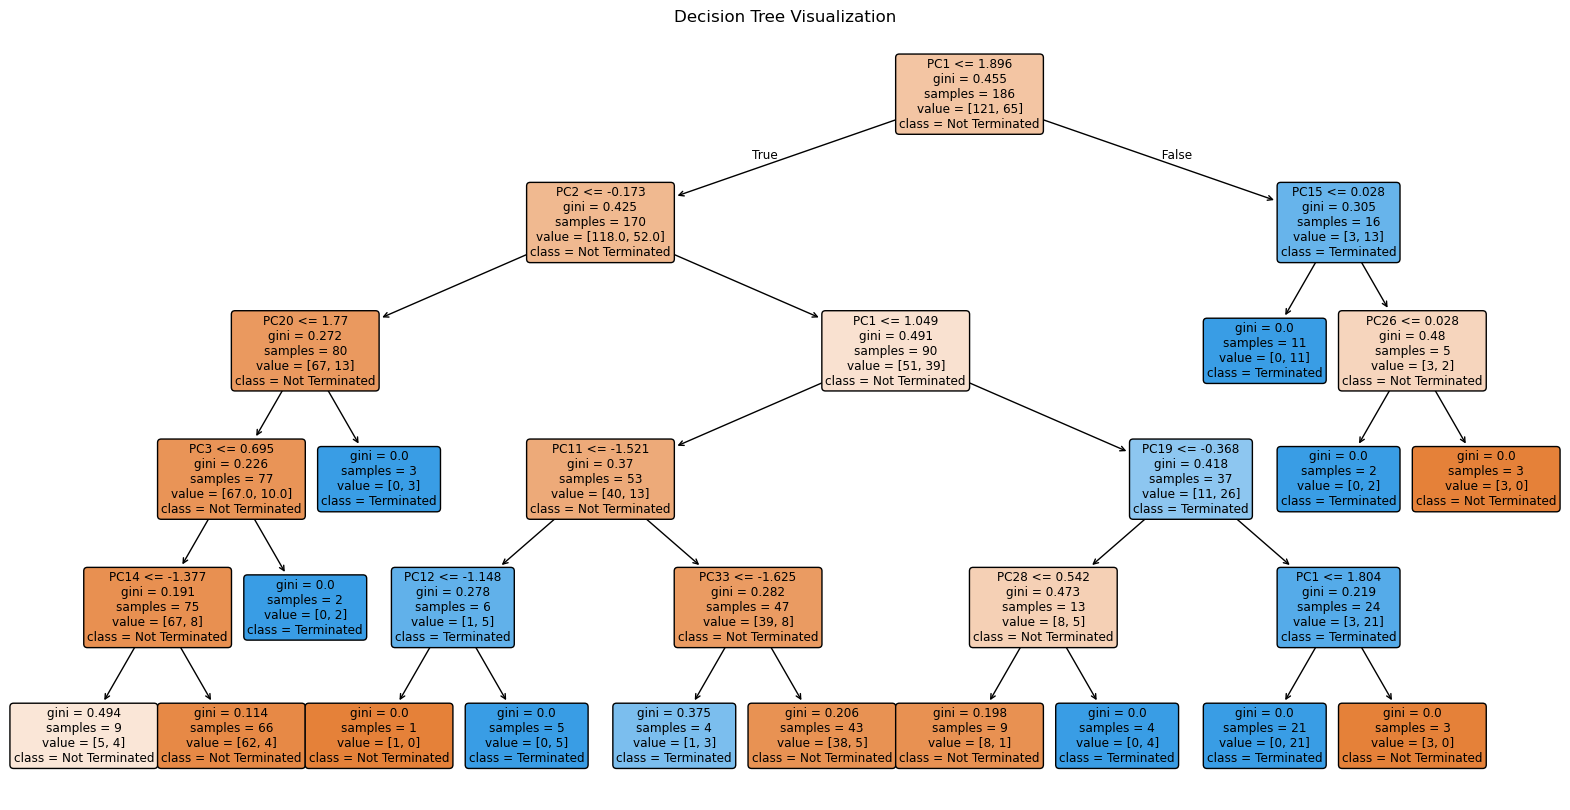

In [79]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

#Training via the Decision Tree Classifier
dt_model_pca = DecisionTreeClassifier(
    max_depth=5,
    criterion="gini"
)
dt_model_pca.fit(X_train_pca, y_train)

# Evaluate the model
dt_test_preds_pca = dt_model_pca.predict(X_test_pca)
dt_acc_pca = accuracy_score(y_test, dt_test_preds_pca)
print(f"Decision Tree Test Accuracy: {dt_acc_pca:.4f}")

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model_pca,
    feature_names=pca_columns,  # Feature names from PCA
    class_names=["Not Terminated", "Terminated"],  # Adjust based on target classes
    filled=True,
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()

# Hyperparameter Tuning with RayTune

## Neural Network

In [71]:
!pip install ray
!pip install ray[tune]
from ray import tune
from ray.train.tensorflow.keras import ReportCheckpointCallback
import ray
from ray.tune.schedulers import AsyncHyperBandScheduler
from ray.tune import Callback

# NN Training Function for Ray Tune
def train_nn_tune(config):
    try:
        model = Sequential([
            Dense(config["layer1_units"], activation="relu", input_shape=(X_train_pca.shape[1],)),
            Dense(config["layer2_units"], activation="relu"),
            Dense(1, activation="sigmoid")
        ])

        model.compile(
            optimizer=Adam(learning_rate=config["lr"]),
            loss="binary_crossentropy",
            metrics=["accuracy"]
        )

        # Use the new callback for reporting during training
        callback = ReportCheckpointCallback(
            metrics={"val_accuracy": "val_accuracy", "loss": "loss"}
        )

        history = model.fit(
            X_train_pca, y_train,
            validation_data=(X_val_pca, y_val),
            epochs=20,
            batch_size=config["batch_size"],
            verbose=0,
            callbacks=[callback]
        )

    except Exception as e:
        print(f"Error during training: {e}")
        raise e

# NN Search Space
nn_search_space = {
    "layer1_units": tune.choice([32, 64, 128]),
    "layer2_units": tune.choice([16, 32, 64]),
    "lr": tune.loguniform(1e-4, 1e-2),
    "batch_size": tune.choice([16, 32]),
}

# Run NN Tuning
analysis = tune.run(
    train_nn_tune,
    config=nn_search_space,
    num_samples=10,
    stop={"training_iteration": 10},
    metric="val_accuracy",  # Metric to optimize (make sure it matches what's reported)
    mode="max",             # Mode of optimization (maximize val_accuracy)
    resources_per_trial={"cpu": 2, "gpu": 0},  # Specify resources for each trial (adjust as needed)
    scheduler=AsyncHyperBandScheduler()
)

best_trial = analysis.get_best_trial("val_accuracy", "max", "last")
print(f"Best trial config: {best_trial.config}")


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
zsh:1: no matches found: ray[tune]


2024-12-29 21:05:52,905	INFO tune.py:616 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949
2024-12-29 21:05:52,924	WARNING callback.py:136 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`


(train_nn_tune pid=55880) /Users/semihozturk/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
(train_nn_tune pid=55880)   super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Trial name,loss,should_checkpoint,val_accuracy
train_nn_tune_8aeaf_00000,0.0515264,True,0.645161
train_nn_tune_8aeaf_00001,0.730313,True,0.548387
train_nn_tune_8aeaf_00002,0.544819,True,0.725806
train_nn_tune_8aeaf_00003,0.721331,True,0.677419
train_nn_tune_8aeaf_00004,0.737229,True,0.564516
train_nn_tune_8aeaf_00005,0.814802,True,0.467742
train_nn_tune_8aeaf_00006,0.750093,True,0.564516
train_nn_tune_8aeaf_00007,0.660026,True,0.629032
train_nn_tune_8aeaf_00008,0.694708,True,0.596774
train_nn_tune_8aeaf_00009,0.732304,True,0.516129


(train_nn_tune pid=55880) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/Users/semihozturk/ray_results/train_nn_tune_2024-12-29_21-05-52/train_nn_tune_8aeaf_00002_2_batch_size=16,layer1_units=64,layer2_units=16,lr=0.0002_2024-12-29_21-05-52/checkpoint_000000)
(train_nn_tune pid=55880) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/Users/semihozturk/ray_results/train_nn_tune_2024-12-29_21-05-52/train_nn_tune_8aeaf_00002_2_batch_size=16,layer1_units=64,layer2_units=16,lr=0.0002_2024-12-29_21-05-52/checkpoint_000001)
(train_nn_tune pid=55880) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/Users/semihozturk/ray_results/train_nn_tune_2024-12-29_21-05-52/train_nn_tune_8aeaf_00002_2_batch_size=16,layer1_units=64,layer2_units=16,lr=0.0002_2024-12-29_21-05-52/checkpoint_000002)
(train_nn_tune pid=55963) /Users/semihozturk/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `

Best trial config: {'layer1_units': 64, 'layer2_units': 16, 'lr': 0.0002311769947535178, 'batch_size': 16}


# Decision Tree Hyperparameter Tuning

In [72]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

class CustomReportingCallback(Callback):
    def on_trial_result(self, iteration, trials, trial, result, **info):
        print(f"Trial {trial}: {result}")

def train_dt_tune(config):
    try:
        # Initialize and Train Model
        model = DecisionTreeClassifier(
            max_depth=config["max_depth"],
            min_samples_split=config["min_samples_split"],
            random_state=42,
            criterion="gini"
        )
        model.fit(X_train_pca, y_train)

        # Validating the Model
        val_preds = model.predict(X_val_pca)
        val_accuracy = accuracy_score(y_val, val_preds)

        # Prepare Results
        return {"val_accuracy": val_accuracy}

    except Exception as e:
        print(f"Error during training: {e}")
        raise e


# Search Space
dt_search_space = {
    "max_depth": tune.choice([5, 10, 15, 20]),
    "min_samples_split": tune.choice([2, 5, 10]),
}

# Scheduler
scheduler = AsyncHyperBandScheduler()

# Run Tuning
analysis = tune.run(
    train_dt_tune,
    config=dt_search_space,
    num_samples=10,
    metric="val_accuracy",
    mode="max",
    resources_per_trial={"cpu": 2},
    scheduler=scheduler,
    callbacks=[CustomReportingCallback()]  # Custom callback to monitor progress
)

# Best Configuration
print("Best configuration found:", analysis.best_config)


2024-12-29 21:06:08,510	INFO tune.py:616 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949
2024-12-29 21:06:08,514	WARNING callback.py:136 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`


Trial train_dt_tune_9435f_00003: {'val_accuracy': 0.532258064516129, 'timestamp': 1735495570, 'checkpoint_dir_name': None, 'done': False, 'training_iteration': 1, 'trial_id': '9435f_00003', 'date': '2024-12-29_21-06-10', 'time_this_iter_s': 0.004231929779052734, 'time_total_s': 0.004231929779052734, 'pid': 56035, 'hostname': 'semihb', 'node_ip': '127.0.0.1', 'config': {'max_depth': 5, 'min_samples_split': 2}, 'time_since_restore': 0.004231929779052734, 'iterations_since_restore': 1}


Trial name,val_accuracy
train_dt_tune_9435f_00000,0.612903
train_dt_tune_9435f_00001,0.564516
train_dt_tune_9435f_00002,0.532258
train_dt_tune_9435f_00003,0.532258
train_dt_tune_9435f_00004,0.629032
train_dt_tune_9435f_00005,0.612903
train_dt_tune_9435f_00006,0.596774
train_dt_tune_9435f_00007,0.612903
train_dt_tune_9435f_00008,0.596774
train_dt_tune_9435f_00009,0.596774


Trial train_dt_tune_9435f_00002: {'val_accuracy': 0.532258064516129, 'timestamp': 1735495570, 'checkpoint_dir_name': None, 'done': False, 'training_iteration': 1, 'trial_id': '9435f_00002', 'date': '2024-12-29_21-06-10', 'time_this_iter_s': 0.003838062286376953, 'time_total_s': 0.003838062286376953, 'pid': 56036, 'hostname': 'semihb', 'node_ip': '127.0.0.1', 'config': {'max_depth': 5, 'min_samples_split': 5}, 'time_since_restore': 0.003838062286376953, 'iterations_since_restore': 1}
Trial train_dt_tune_9435f_00000: {'val_accuracy': 0.6129032258064516, 'timestamp': 1735495570, 'checkpoint_dir_name': None, 'done': False, 'training_iteration': 1, 'trial_id': '9435f_00000', 'date': '2024-12-29_21-06-10', 'time_this_iter_s': 0.004850864410400391, 'time_total_s': 0.004850864410400391, 'pid': 56033, 'hostname': 'semihb', 'node_ip': '127.0.0.1', 'config': {'max_depth': 20, 'min_samples_split': 5}, 'time_since_restore': 0.004850864410400391, 'iterations_since_restore': 1}
Trial train_dt_tune_94

2024-12-29 21:06:15,345	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/Users/semihozturk/ray_results/train_dt_tune_2024-12-29_21-06-08' in 0.0071s.
2024-12-29 21:06:15,348	INFO tune.py:1041 -- Total run time: 6.84 seconds (6.82 seconds for the tuning loop).


Best configuration found: {'max_depth': 20, 'min_samples_split': 10}


# XGboost Hyperparameter Tuning

In [73]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

class XGBoostReportCallback(Callback):
    def on_trial_result(self, iteration, trials, trial, result, **info):
        val_accuracy = result.get("val_accuracy", None)
        if val_accuracy is not None:
            print(f"Trial {trial}: Validation Accuracy = {val_accuracy}")

def train_xgb_tune(config):
    try:
        # Initialize the XGBoost model
        model = xgb.XGBClassifier(
            n_estimators=config["n_estimators"],
            max_depth=config["max_depth"],
            learning_rate=config["lr"],
            random_state=42,
            use_label_encoder=False,
            eval_metric="logloss"
        )

        # Fit the model on the training data
        model.fit(X_train_pca, y_train)

        # Predict on the validation set
        val_preds = model.predict(X_val_pca)

        # Calculate validation accuracy
        val_accuracy = accuracy_score(y_val, val_preds)

        # Return metrics in a structured way
        return {"val_accuracy": val_accuracy}

    except Exception as e:
        print(f"Error during training: {e}")
        raise e

# XGBoost Search Space
xgb_search_space = {
    "n_estimators": tune.choice([50, 100, 150]),
    "max_depth": tune.choice([3, 6, 9]),
    "lr": tune.loguniform(0.01, 0.2),
}

tune.run(
    train_xgb_tune,
    config=xgb_search_space,
    num_samples=20,
    stop={"training_iteration": 10},
    metric="val_accuracy",
    mode="max",  # Maximize validation accuracy
    resources_per_trial={"cpu": 2, "gpu": 0},
    scheduler=AsyncHyperBandScheduler(),
    callbacks=[XGBoostReportCallback()],
)


2024-12-29 21:06:15,360	INFO tune.py:616 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949
2024-12-29 21:06:15,364	WARNING callback.py:136 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`


Trial train_xgb_tune_984b1_00001: Validation Accuracy = 0.6129032258064516


Trial name,val_accuracy
train_xgb_tune_984b1_00000,0.612903
train_xgb_tune_984b1_00001,0.612903
train_xgb_tune_984b1_00002,0.629032
train_xgb_tune_984b1_00003,0.629032
train_xgb_tune_984b1_00004,0.66129
train_xgb_tune_984b1_00005,0.612903
train_xgb_tune_984b1_00006,0.612903
train_xgb_tune_984b1_00007,0.629032
train_xgb_tune_984b1_00008,0.596774
train_xgb_tune_984b1_00009,0.629032


Trial train_xgb_tune_984b1_00002: Validation Accuracy = 0.6290322580645161


(train_xgb_tune pid=56106) [21:06:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
(train_xgb_tune pid=56106) Parameters: { "use_label_encoder" } are not used.
(train_xgb_tune pid=56106) 
(train_xgb_tune pid=56107) 
(train_xgb_tune pid=56108) 
(train_xgb_tune pid=56109) 


Trial train_xgb_tune_984b1_00000: Validation Accuracy = 0.6129032258064516
Trial train_xgb_tune_984b1_00003: Validation Accuracy = 0.6290322580645161
Trial train_xgb_tune_984b1_00004: Validation Accuracy = 0.6612903225806451


(train_xgb_tune pid=56155) 
(train_xgb_tune pid=56154) 
(train_xgb_tune pid=56157) 


Trial train_xgb_tune_984b1_00007: Validation Accuracy = 0.6290322580645161


(train_xgb_tune pid=56156) 


Trial train_xgb_tune_984b1_00006: Validation Accuracy = 0.6129032258064516
Trial train_xgb_tune_984b1_00005: Validation Accuracy = 0.6129032258064516
Trial train_xgb_tune_984b1_00009: Validation Accuracy = 0.6290322580645161


(train_xgb_tune pid=56184) 
(train_xgb_tune pid=56184) [21:06:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:  [repeated 8x across cluster]
(train_xgb_tune pid=56184) Parameters: { "use_label_encoder" } are not used. [repeated 8x across cluster]
(train_xgb_tune pid=56185) 


Trial train_xgb_tune_984b1_00008: Validation Accuracy = 0.5967741935483871


(train_xgb_tune pid=56183) 
(train_xgb_tune pid=56186) 


Trial train_xgb_tune_984b1_00010: Validation Accuracy = 0.6129032258064516
Trial train_xgb_tune_984b1_00011: Validation Accuracy = 0.6129032258064516
Trial train_xgb_tune_984b1_00012: Validation Accuracy = 0.6129032258064516


(train_xgb_tune pid=56232) 
(train_xgb_tune pid=56234) 
(train_xgb_tune pid=56233) 


Trial train_xgb_tune_984b1_00013: Validation Accuracy = 0.6129032258064516
Trial train_xgb_tune_984b1_00015: Validation Accuracy = 0.6290322580645161


(train_xgb_tune pid=56235) 


Trial train_xgb_tune_984b1_00014: Validation Accuracy = 0.6612903225806451
Trial train_xgb_tune_984b1_00019: Validation Accuracy = 0.5967741935483871


(train_xgb_tune pid=56260) 
(train_xgb_tune pid=56260) [21:06:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:  [repeated 8x across cluster]
(train_xgb_tune pid=56260) Parameters: { "use_label_encoder" } are not used. [repeated 8x across cluster]
(train_xgb_tune pid=56261) 
(train_xgb_tune pid=56262) 
(train_xgb_tune pid=56263) 


Trial train_xgb_tune_984b1_00018: Validation Accuracy = 0.6451612903225806
Trial train_xgb_tune_984b1_00016: Validation Accuracy = 0.6290322580645161
Trial train_xgb_tune_984b1_00017: Validation Accuracy = 0.6290322580645161


2024-12-29 21:06:28,892	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/Users/semihozturk/ray_results/train_xgb_tune_2024-12-29_21-06-15' in 0.0086s.
2024-12-29 21:06:28,896	INFO tune.py:1041 -- Total run time: 13.54 seconds (13.52 seconds for the tuning loop).


# Evaluating the PCA used models

In [80]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

# Since all of the models we trained are classification tasks;
# Neural Network: Sigmoid activation function which is mostly used in the classification task.
# Model is compiled with 'binary_crossentropy' also indicating the classification.

# XGboost: This is also a classification model because we're using XGBClassifier. It is designed for binary or multi-class classification tasks.

# Decision Tree: This is also a classification model since we're using DecisionTreeClassifier.

# In summary, accuracy, precision, recall and F1 scores are some of the most important metrics in our classification tasks.

def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print("Performance Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

    return accuracy, precision, recall, f1, roc_auc, conf_matrix, class_report


models = {
    'Decision Tree': dt_model_pca,
    'XGBoost': xgb_model_pca,
    'Neural Network': nn_model_pca,
}

results = {}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")

    y_pred = model.predict(X_test_pca)

    if model_name == 'Neural Network':
        # Here we had to convert the y_pred values to binary since the model is giving us the probabilities.
        y_pred = (y_pred > 0.5).astype(int)

    metrics = evaluate_model(y_test, y_pred)

    results[model_name] = metrics

print("\nSummary of All Models with the PCA:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Accuracy: {metrics[0]:.4f}, Precision: {metrics[1]:.4f}, Recall: {metrics[2]:.4f}, F1-Score: {metrics[3]:.4f}, ROC AUC: {metrics[4]:.4f}")
    print("\nConfusion Matrix:")
    print(metrics[5])
    print("\nClassification Report:")
    print(metrics[6])

Evaluating Decision Tree...
Performance Metrics:
Accuracy: 0.6984
Precision: 0.6667
Recall: 0.3478
F1-Score: 0.4571
ROC AUC: 0.6239

Confusion Matrix:
[[36  4]
 [15  8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.90      0.79        40
           1       0.67      0.35      0.46        23

    accuracy                           0.70        63
   macro avg       0.69      0.62      0.62        63
weighted avg       0.69      0.70      0.67        63

Evaluating XGBoost...
Performance Metrics:
Accuracy: 0.7302
Precision: 0.6500
Recall: 0.5652
F1-Score: 0.6047
ROC AUC: 0.6951

Confusion Matrix:
[[33  7]
 [10 13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.80        40
           1       0.65      0.57      0.60        23

    accuracy                           0.73        63
   macro avg       0.71      0.70      0.70        63
weighted avg       

# Neural Network without the PCA

In [85]:
def build_nn():
    model = Sequential([
        Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)),
        Dense(32, activation="relu"),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
    return model

nn_model = build_nn()
nn_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_val_scaled, y_val), verbose=1)

nn_loss, nn_acc = nn_model.evaluate(X_test_scaled, y_test)
print(f"NN Test Accuracy: {nn_acc:.4f}")

Epoch 1/20


/Users/semihozturk/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5454 - loss: 0.6918 - val_accuracy: 0.7258 - val_loss: 0.6377
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6014 - loss: 0.6394 - val_accuracy: 0.7742 - val_loss: 0.6022
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6873 - loss: 0.6029 - val_accuracy: 0.7903 - val_loss: 0.5834
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7472 - loss: 0.5615 - val_accuracy: 0.7903 - val_loss: 0.5699
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7791 - loss: 0.5111 - val_accuracy: 0.7742 - val_loss: 0.5614
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7412 - loss: 0.5299 - val_accuracy: 0.7581 - val_loss: 0.5558
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7799 - loss: 0.4918 - val_accuracy: 0.7581 - val_loss: 0.5514
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8178 - loss: 0.4744 - val_accuracy: 0.7581 - val_loss: 0.5473
Epoch 9/20
6/6 ━━━

# XgBoost without the PCA

In [88]:
xgb_model = xgb.XGBClassifier(random_state=42, n_estimators=100, max_depth=6, learning_rate=0.1)
xgb_model.fit(X_train_scaled, y_train)

xgb_test_preds = xgb_model.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, xgb_test_preds)
print(f"XGBoost Test Accuracy: {xgb_accuracy:.4f}")

XGBoost Test Accuracy: 0.7619


# Decision Tree without the PCA

Decision Tree Test Accuracy: 0.7460


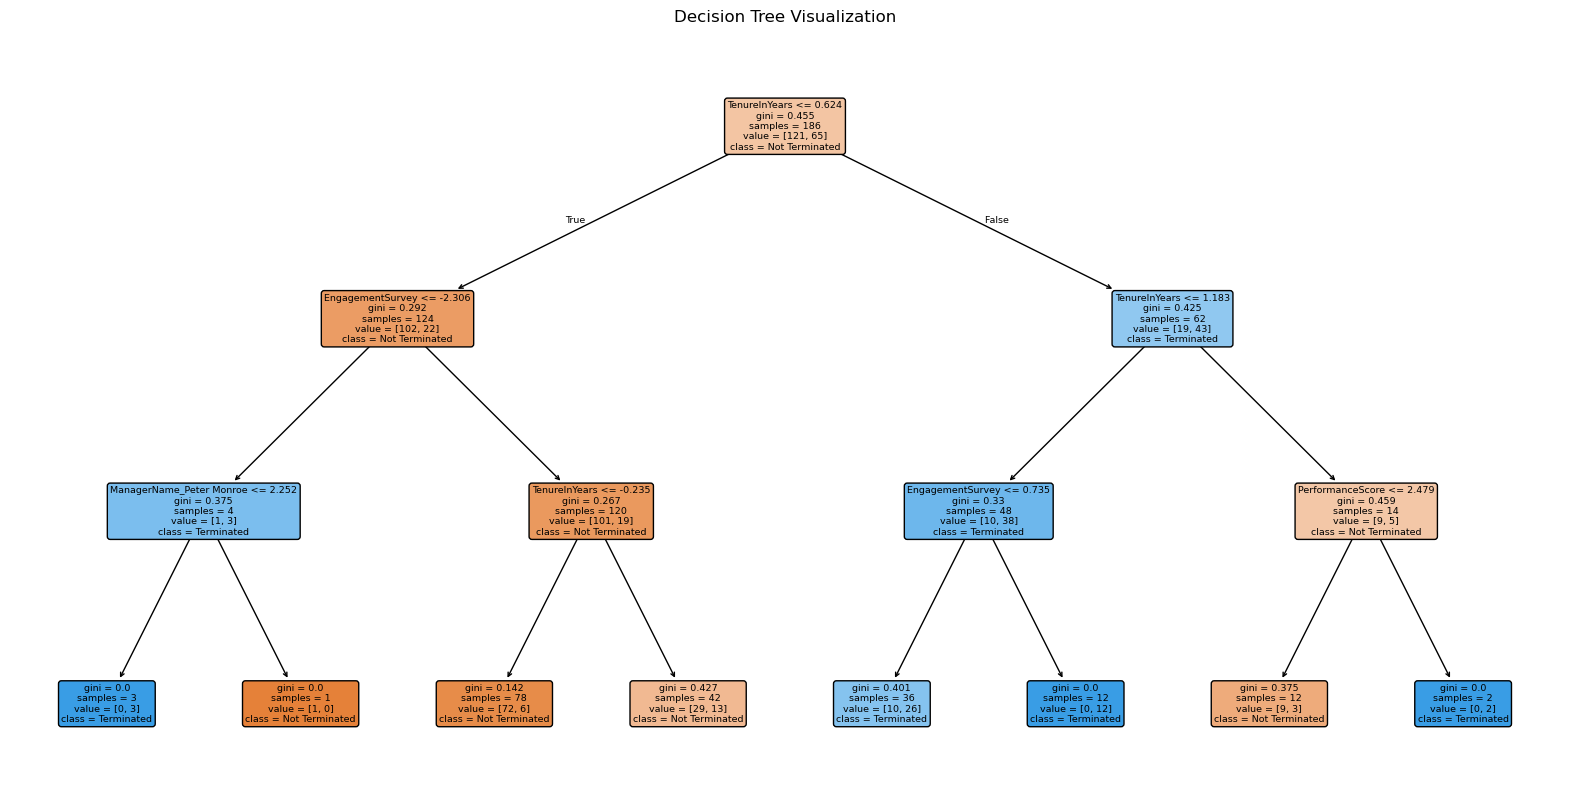

In [91]:
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=3,
    criterion="gini"
)
dt_model.fit(X_train_scaled, y_train)

dt_test_preds = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_test_preds)
print(f"Decision Tree Test Accuracy: {dt_accuracy:.4f}")

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=features,
    class_names=["Not Terminated", "Terminated"],
    filled=True,
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()

# Evaluating models without the PCA

In [92]:
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print("Performance Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

    return accuracy, precision, recall, f1, roc_auc, conf_matrix, class_report

models = {
    'Decision Tree (non-PCA)': dt_model,
    'XGBoost (non-PCA)': xgb_model,
    'Neural Network (non-PCA)': nn_model,
}

results = {}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")

    y_pred = model.predict(X_test_scaled)

    if model_name == 'Neural Network (non-PCA)':
        y_pred = (y_pred > 0.5).astype(int)

    metrics = evaluate_model(y_test, y_pred)
    results[model_name] = metrics

print("\nSummary of All Models without the PCA:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Accuracy: {metrics[0]:.4f}, Precision: {metrics[1]:.4f}, Recall: {metrics[2]:.4f}, F1-Score: {metrics[3]:.4f}, ROC AUC: {metrics[4]:.4f}")
    print("\nConfusion Matrix:")
    print(metrics[5])
    print("\nClassification Report:")
    print(metrics[6])

Evaluating Decision Tree (non-PCA)...
Performance Metrics:
Accuracy: 0.7460
Precision: 0.6667
Recall: 0.6087
F1-Score: 0.6364
ROC AUC: 0.7168

Confusion Matrix:
[[33  7]
 [ 9 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80        40
           1       0.67      0.61      0.64        23

    accuracy                           0.75        63
   macro avg       0.73      0.72      0.72        63
weighted avg       0.74      0.75      0.74        63

Evaluating XGBoost (non-PCA)...
Performance Metrics:
Accuracy: 0.7619
Precision: 0.6667
Recall: 0.6957
F1-Score: 0.6809
ROC AUC: 0.7478

Confusion Matrix:
[[32  8]
 [ 7 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        40
           1       0.67      0.70      0.68        23

    accuracy                           0.76        63
   macro avg       0.74      0.75      0.75        63

# Comparison of PCA and Non-PCA Model Accuracies

<Figure size 1000x600 with 0 Axes>

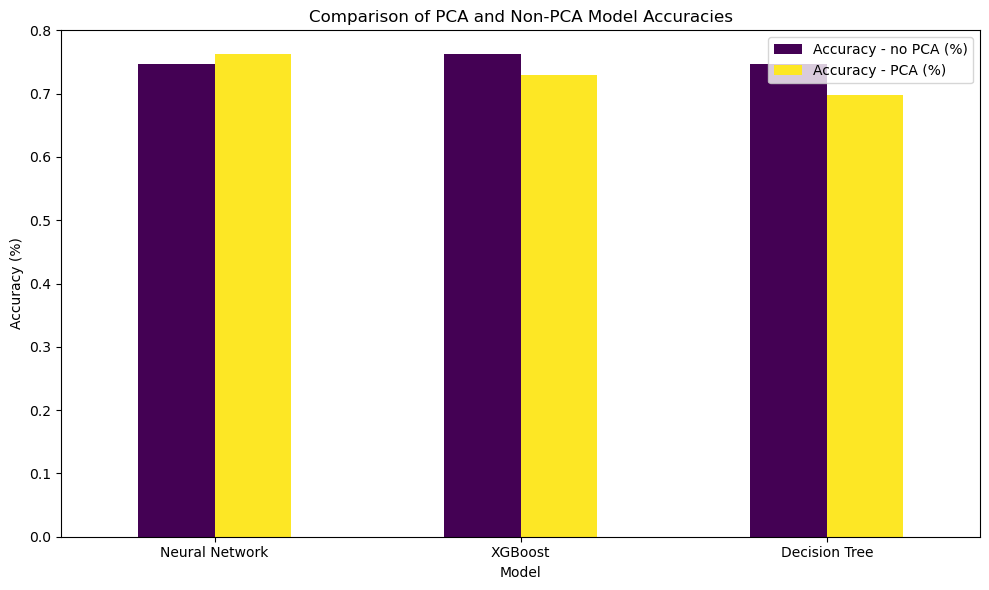

            Model  Accuracy - no PCA (%)  Accuracy - PCA (%)
0  Neural Network               0.746032            0.761905
1         XGBoost               0.761905            0.730159
2   Decision Tree               0.746032            0.698413


In [93]:
accuracy = {
    'Model': ['Neural Network', 'XGBoost', 'Decision Tree'],
    'Accuracy - no PCA (%)': [nn_acc, xgb_accuracy, dt_accuracy],
    'Accuracy - PCA (%)': [nn_acc_pca, xgb_acc_pca, dt_acc_pca]
}

acc = pd.DataFrame(data=accuracy)

plt.figure(figsize=(10, 6))
acc.set_index('Model').plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Comparison of PCA and Non-PCA Model Accuracies')
plt.ylabel('Accuracy (%)')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

print(acc)

# Feature Importance Neural Network - non-PCA

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0

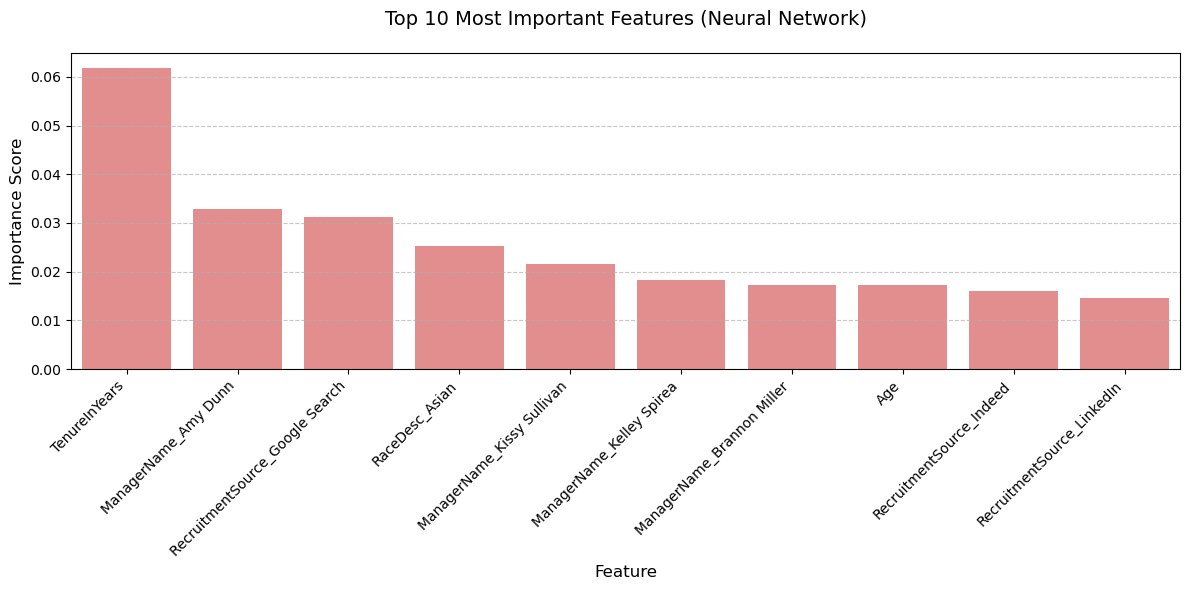


Top 10 Feature Importance Scores (Neural Network)
TenureInYears: 0.0618 (±0.0091)
ManagerName_Amy Dunn: 0.0328 (±0.0070)
RecruitmentSource_Google Search: 0.0312 (±0.0127)
RaceDesc_Asian: 0.0253 (±0.0064)
ManagerName_Kissy Sullivan: 0.0215 (±0.0042)
ManagerName_Kelley Spirea: 0.0183 (±0.0043)
ManagerName_Brannon Miller: 0.0172 (±0.0040)
Age: 0.0172 (±0.0063)
RecruitmentSource_Indeed: 0.0161 (±0.0096)
RecruitmentSource_LinkedIn: 0.0145 (±0.0054)


In [94]:
from sklearn.inspection import permutation_importance

# This is created to evaluate the feature importance of the Neural Network model.
def nn_scorer(model, X, y):
    y_pred = model.predict(X)
    y_pred_binary = (y_pred > 0.5).astype(int)
    return accuracy_score(y, y_pred_binary)

# Apply permutation importance to evaluate feature importance
nn_results = permutation_importance(nn_model, X_train_scaled, y_train,
                                    n_repeats=10, 
                                    random_state=42, 
                                    scoring=nn_scorer)

importance_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': nn_results.importances_mean,
    'Std': nn_results.importances_std
})

top_10_features = importance_df.sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_features, 
            x='Feature', 
            y='Importance',
            color='lightcoral',
            errorbar='sd',
            capsize=3)

plt.title("Top 10 Most Important Features (Neural Network)", fontsize=14, pad=20)
plt.ylabel("Importance Score", fontsize=12)
plt.xlabel("Feature", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("\nTop 10 Feature Importance Scores (Neural Network)")
for idx, row in top_10_features.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f} (±{row['Std']:.4f})")

# Feature Importance Decision Tree - non-PCA

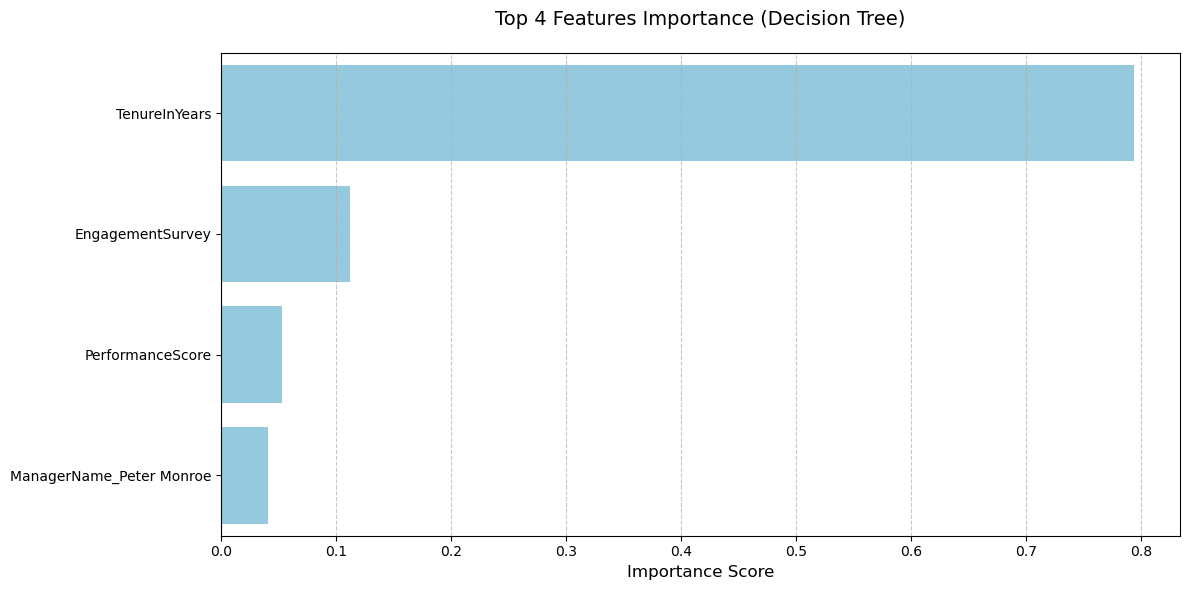


Top 4 Feature Importance Scores (Decision Tree):
TenureInYears: 0.7943
EngagementSurvey: 0.1120
PerformanceScore: 0.0527
ManagerName_Peter Monroe: 0.0410


In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Decision Tree Feature Importance
dt_importance = pd.Series(dt_model.feature_importances_, index=X_train_scaled.columns)
top_4_dt = dt_importance.sort_values(ascending=False).head(4)

# Create the plot for Decision Tree
plt.figure(figsize=(12, 6))
sns.barplot(x=top_4_dt.values, 
            y=top_4_dt.index, 
            color='skyblue', 
            orient='h')
plt.title("Top 4 Features Importance (Decision Tree)", fontsize=14, pad=20)
plt.xlabel("Importance Score", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

# Print numerical values for Decision Tree
print("\nTop 4 Feature Importance Scores (Decision Tree):")
for feature, importance in top_4_dt.items():
    print(f"{feature}: {importance:.4f}")

# Feature Importance XgBoost - non-PCA

<Figure size 1000x600 with 0 Axes>

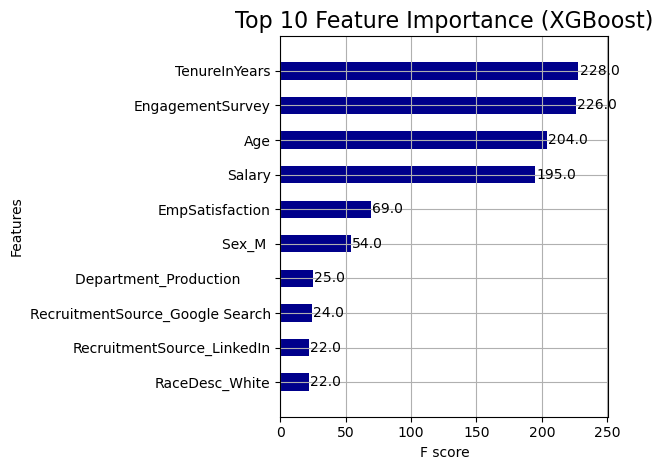


Top 10 Feature Importance Scores (XGBoost): 
Salary: 195.0
EngagementSurvey: 226.0
EmpSatisfaction: 69.0
PerformanceScore: 11.0
Age: 204.0
TenureInYears: 228.0
Department_IT/IS: 4.0
Department_Production       : 25.0
Position_Data Analyst: 3.0
Position_Production Technician I: 6.0
Position_Production Technician II: 8.0
ManagerName_Ketsia Liebig: 12.0
ManagerName_Michael Albert: 9.0
ManagerName_Peter Monroe: 7.0
ManagerName_Simon Roup: 16.0
Sex_M : 54.0
RaceDesc_Black or African American: 3.0
RaceDesc_White: 22.0
RecruitmentSource_Diversity Job Fair: 7.0
RecruitmentSource_Employee Referral: 1.0
RecruitmentSource_Google Search: 24.0
RecruitmentSource_Indeed: 11.0
RecruitmentSource_LinkedIn: 22.0


In [91]:
from xgboost import plot_importance

plt.figure(figsize=(10, 6))
plot_importance(xgb_model,
                importance_type='weight', 
                max_num_features=10,
                title='Top 10 Feature Importance (XGBoost)',
                height=0.5,
                color='darkblue')

plt.title('Top 10 Feature Importance (XGBoost)', fontsize=16)
plt.tight_layout()
plt.show()

print("\nTop 10 Feature Importance Scores (XGBoost): ")

for feature, importance in xgb_model.get_booster().get_score(importance_type='weight').items():
    print(f"{feature}: {importance}")

# Feature Importance for PCA Results

### We should first get the PCA loadings and then get the feature importance.
### Loadings are the coefficients of the linear combination of the original variables that make up the principal component.

In [83]:
pca_loadings = pca.components_.T 
loadings_df = pd.DataFrame(pca_loadings, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])], index=X_train.columns)

# We now have the Loadings for each principal component
print(loadings_df.head())

                       PC1       PC2       PC3       PC4       PC5       PC6  \
Salary           -0.290932 -0.086685  0.050109  0.301653 -0.040300 -0.003252   
EngagementSurvey -0.012004 -0.054678  0.008489  0.074837  0.088967 -0.017886   
EmpSatisfaction  -0.052313  0.068165 -0.047636 -0.046999  0.186093 -0.214790   
PerformanceScore  0.032793  0.024951  0.019708 -0.052988 -0.178572  0.094947   
Age               0.048694 -0.151166  0.069400 -0.107244  0.061864 -0.021143   

                       PC7       PC8       PC9      PC10  ...      PC26  \
Salary           -0.045083 -0.040160  0.055638 -0.094848  ...  0.015933   
EngagementSurvey  0.391334 -0.025815 -0.068997  0.100224  ...  0.186115   
EmpSatisfaction   0.101231  0.249944 -0.057804 -0.025883  ... -0.046930   
PerformanceScore -0.306491 -0.016149  0.036936 -0.089542  ... -0.103368   
Age              -0.004380  0.048019 -0.190651 -0.190447  ... -0.101047   

                      PC27      PC28      PC29      PC30      PC31  

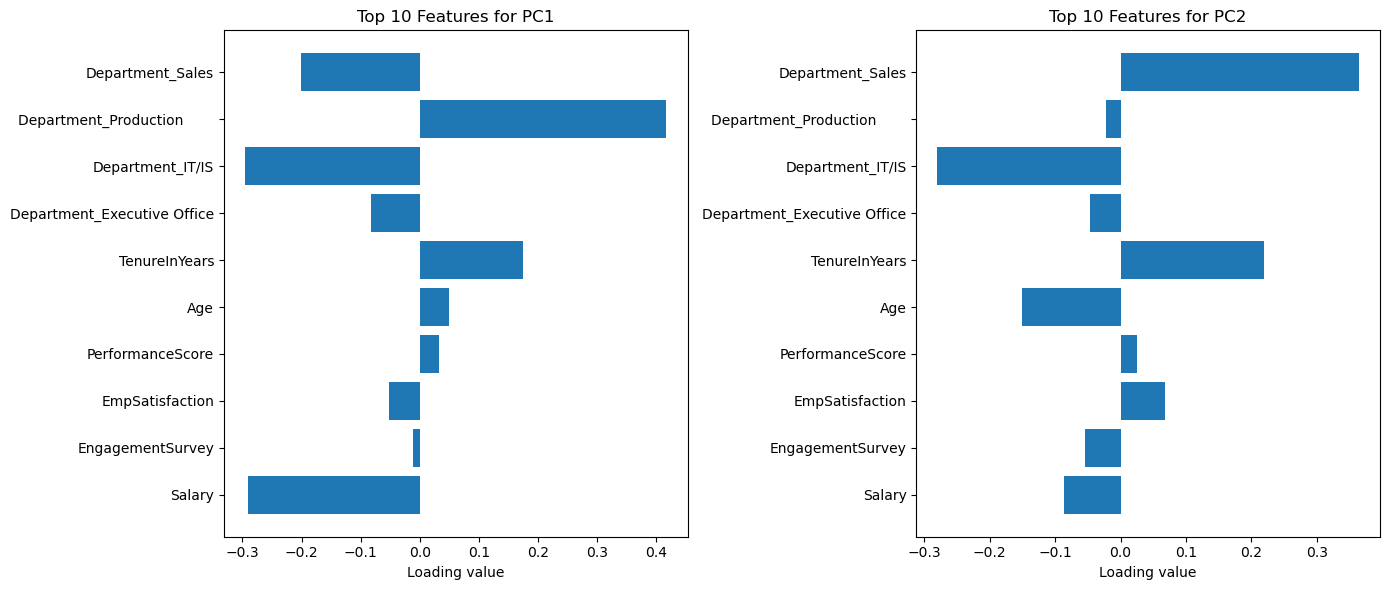

Top 10 features contributing to PC1:
Department_Production               0.417225
Department_IT/IS                    0.295847
Salary                              0.290932
Position_Production Technician I    0.266325
ManagerName_Simon Roup              0.218890
Department_Sales                    0.201689
Position_Area Sales Manager         0.195548
RecruitmentSource_Google Search     0.177676
TenureInYears                       0.175030
ManagerName_John Smith              0.168421
Name: PC1, dtype: float64

Top 10 features contributing to PC2:
Position_Area Sales Manager           0.372798
Department_Sales                      0.364146
ManagerName_John Smith                0.361993
Department_IT/IS                      0.279781
ManagerName_Simon Roup                0.225634
TenureInYears                         0.218828
CitizenDesc_US Citizen                0.203088
RaceDesc_White                        0.199338
RaceDesc_Black or African American    0.177530
ManagerName_Lynn Daneault 

In [84]:
# First few principal components loadings for the first 10 features
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# PC1 Loadings
axes[0].barh(loadings_df.index[:10], loadings_df['PC1'][:10])
axes[0].set_title('Top 10 Features for PC1')
axes[0].set_xlabel('Loading value')

# PC2 Loadings
axes[1].barh(loadings_df.index[:10], loadings_df['PC2'][:10])
axes[1].set_title('Top 10 Features for PC2')
axes[1].set_xlabel('Loading value')

plt.tight_layout()
plt.show()

# now for each PC
for pc in range(pca_loadings.shape[1]):
    sorted_features = loadings_df.iloc[:, pc].abs().sort_values(ascending=False).head(10)
    print(f"Top 10 features contributing to PC{pc+1}:")
    print(sorted_features)
    print()

# Decision Tree Feature Importance - PCA

In [85]:
# Firstly, getting the importances of the features on the principal components for the Decision Tree model.
dt_pca_importances = dt_model_pca.feature_importances_

dt_pca_importance_df = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(pca.n_components_)],
    'Importance': dt_pca_importances
})

print("Decision Tree Model Feature Importances on Principal Components:")
print(dt_pca_importance_df)

Decision Tree Model Feature Importances on Principal Components:
      PC  Importance
0    PC1    0.157235
1    PC2    0.000000
2    PC3    0.000000
3    PC4    0.000000
4    PC5    0.029716
5    PC6    0.055062
6    PC7    0.048210
7    PC8    0.000000
8    PC9    0.121926
9   PC10    0.049071
10  PC11    0.000000
11  PC12    0.061393
12  PC13    0.000000
13  PC14    0.059222
14  PC15    0.021631
15  PC16    0.000000
16  PC17    0.000000
17  PC18    0.000000
18  PC19    0.000000
19  PC20    0.158645
20  PC21    0.000000
21  PC22    0.000000
22  PC23    0.000000
23  PC24    0.000000
24  PC25    0.000000
25  PC26    0.000000
26  PC27    0.000000
27  PC28    0.000000
28  PC29    0.100119
29  PC30    0.000000
30  PC31    0.000000
31  PC32    0.000000
32  PC33    0.137769
33  PC34    0.000000
34  PC35    0.000000


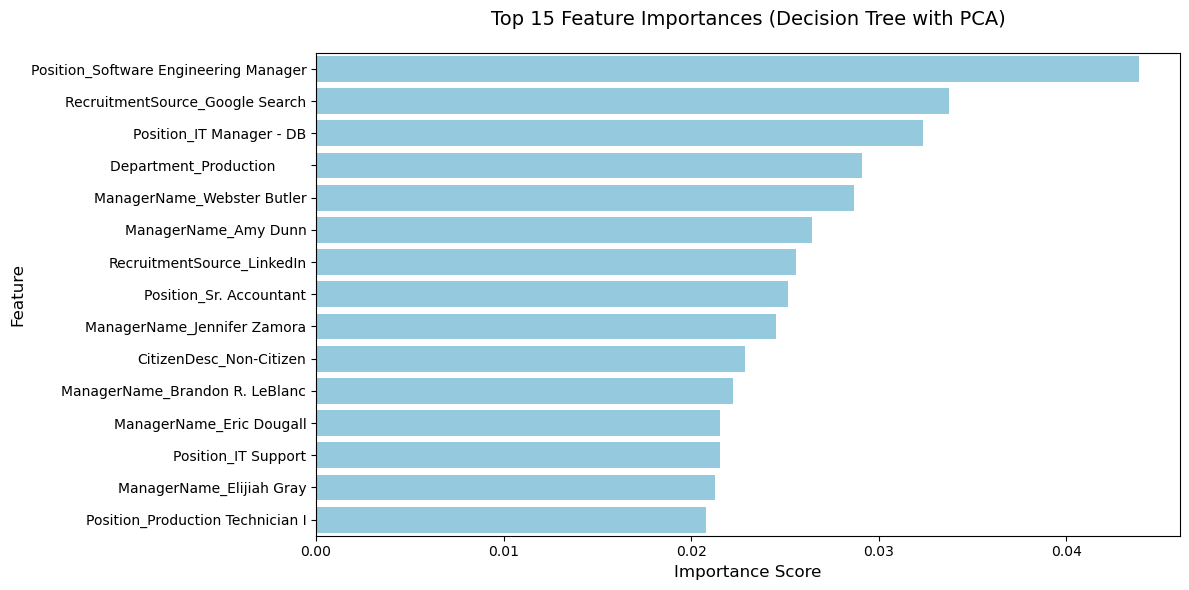


Top 15 Feature Importance Scores (Decision Tree with PCA):
Position_Software Engineering Manager: 0.0439
RecruitmentSource_Google Search: 0.0338
Position_IT Manager - DB: 0.0324
Department_Production       : 0.0291
ManagerName_Webster Butler: 0.0287
ManagerName_Amy Dunn: 0.0264
RecruitmentSource_LinkedIn: 0.0256
Position_Sr. Accountant: 0.0252
ManagerName_Jennifer Zamora: 0.0245
CitizenDesc_Non-Citizen: 0.0229
ManagerName_Brandon R. LeBlanc: 0.0222
ManagerName_Eric Dougall: 0.0215
Position_IT Support: 0.0215
ManagerName_Elijiah Gray: 0.0213
Position_Production Technician I: 0.0208


In [86]:
# Multiply the squared loadings by the model's feature importances
# and sum over all components to get the importance of each original feature
dt_original_feat_imp = np.dot(
    loadings_df.values**2,
    dt_pca_importance_df['Importance'].values
)

dt_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_original_feat_imp
})

dt_top_features = dt_feature_importance_df.sort_values('Importance', ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=dt_top_features,
    x='Importance',
    y='Feature',
    color='skyblue',
    orient='h'
)
plt.title("Top 15 Feature Importances (Decision Tree with PCA)", fontsize=14, pad=20)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()
    
print("\nTop 15 Feature Importance Scores (Decision Tree with PCA):")
for idx, row in dt_top_features.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

# XGBoost Feature Importance - PCA

In [87]:
xgb_pca_importances = xgb_model_pca.feature_importances_

xgb_pca_importance_df = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(pca.n_components_)],
    'Importance': xgb_pca_importances
})

print("XGBoost Model Feature Importances on Principal Components:")
print(xgb_pca_importance_df)

XGBoost Model Feature Importances on Principal Components:
      PC  Importance
0    PC1    0.083299
1    PC2    0.017858
2    PC3    0.024770
3    PC4    0.036699
4    PC5    0.018546
5    PC6    0.019278
6    PC7    0.028541
7    PC8    0.018007
8    PC9    0.039349
9   PC10    0.048476
10  PC11    0.009415
11  PC12    0.022830
12  PC13    0.020978
13  PC14    0.034341
14  PC15    0.006815
15  PC16    0.019892
16  PC17    0.008140
17  PC18    0.031499
18  PC19    0.024563
19  PC20    0.066485
20  PC21    0.036325
21  PC22    0.011479
22  PC23    0.024267
23  PC24    0.028611
24  PC25    0.013712
25  PC26    0.016259
26  PC27    0.027357
27  PC28    0.021884
28  PC29    0.057233
29  PC30    0.011552
30  PC31    0.030737
31  PC32    0.027099
32  PC33    0.067420
33  PC34    0.035272
34  PC35    0.011011


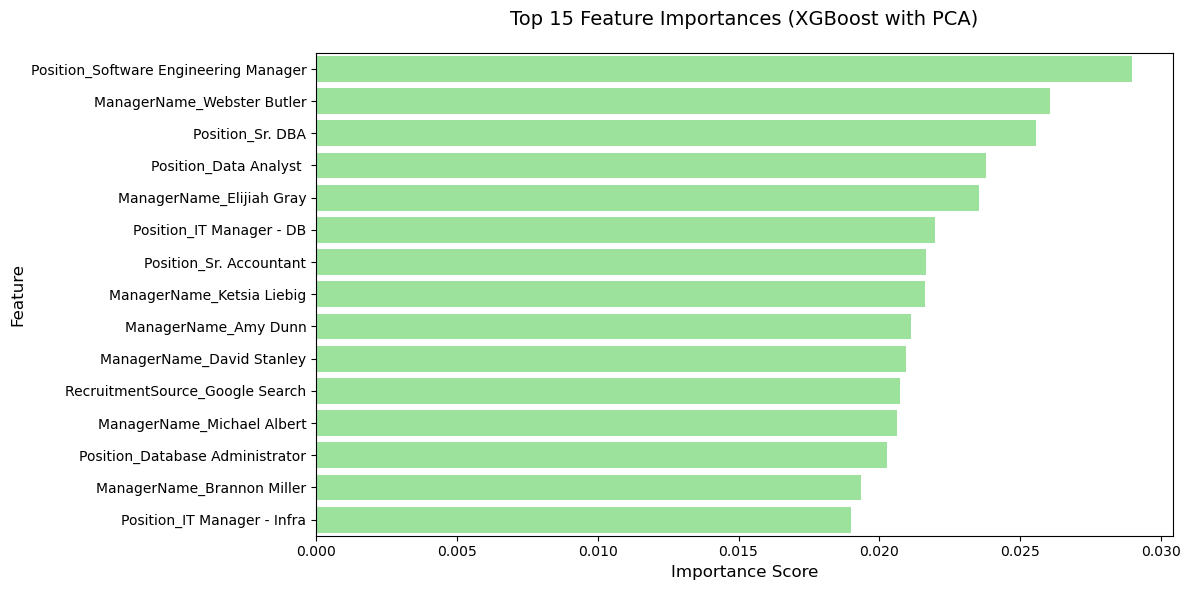


Top 15 Feature Importance Scores (XGBoost with PCA):
Position_Software Engineering Manager: 0.0290
ManagerName_Webster Butler: 0.0261
Position_Sr. DBA: 0.0255
Position_Data Analyst : 0.0238
ManagerName_Elijiah Gray: 0.0235
Position_IT Manager - DB: 0.0220
Position_Sr. Accountant: 0.0217
ManagerName_Ketsia Liebig: 0.0216
ManagerName_Amy Dunn: 0.0211
ManagerName_David Stanley: 0.0209
RecruitmentSource_Google Search: 0.0207
ManagerName_Michael Albert: 0.0206
Position_Database Administrator: 0.0203
ManagerName_Brannon Miller: 0.0194
Position_IT Manager - Infra: 0.0190


In [88]:
xgb_original_feat_imp = np.dot(
    loadings_df.values**2,
    xgb_pca_importance_df['Importance'].values
)

xgb_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_original_feat_imp
})

xgb_top_features = xgb_feature_importance_df.sort_values('Importance', ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=xgb_top_features,
    x='Importance',
    y='Feature',
    color='lightgreen',
    orient='h'
)
plt.title("Top 15 Feature Importances (XGBoost with PCA)", fontsize=14, pad=20)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

print("\nTop 15 Feature Importance Scores (XGBoost with PCA):")
for idx, row in xgb_top_features.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

# Neural Network Feature Importance - PCA

### In NNs its kind of hard to get feature importance compared to other models we've used, but we can get the weights of the input layer and multiply by the loadings to get the feature importance.

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 

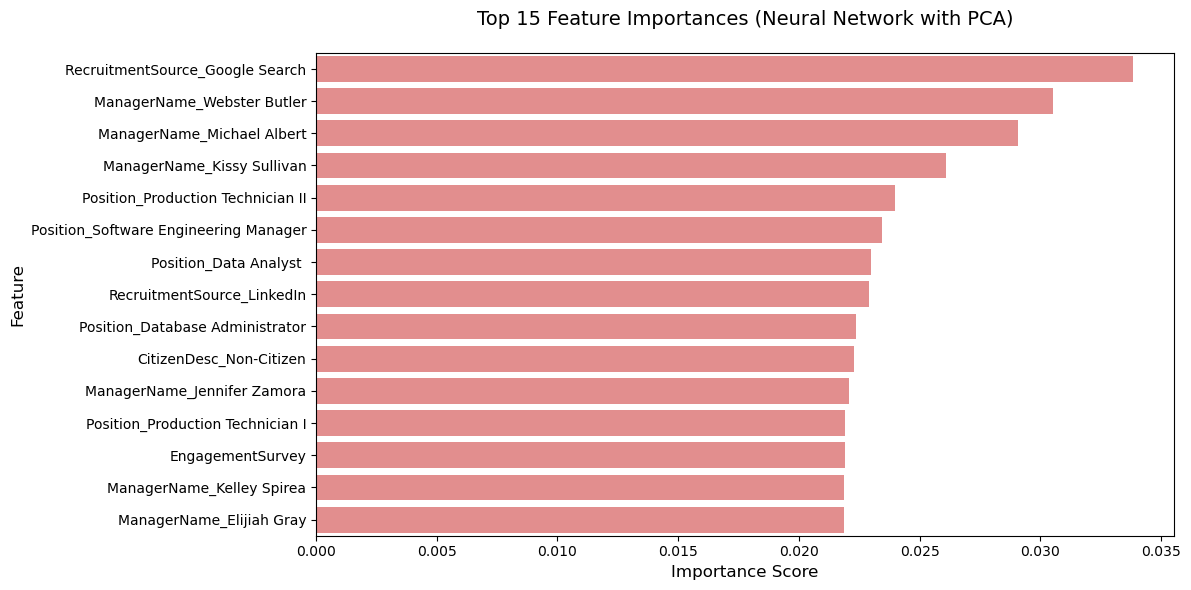


Top 15 Feature Importance Scores (Neural Network with PCA):
RecruitmentSource_Google Search: 0.0338
ManagerName_Webster Butler: 0.0305
ManagerName_Michael Albert: 0.0291
ManagerName_Kissy Sullivan: 0.0261
Position_Production Technician II: 0.0240
Position_Software Engineering Manager: 0.0234
Position_Data Analyst : 0.0230
RecruitmentSource_LinkedIn: 0.0229
Position_Database Administrator: 0.0224
CitizenDesc_Non-Citizen: 0.0223
ManagerName_Jennifer Zamora: 0.0221
Position_Production Technician I: 0.0219
EngagementSurvey: 0.0219
ManagerName_Kelley Spirea: 0.0219
ManagerName_Elijiah Gray: 0.0219


In [89]:
def nn_scorer_pca(model, X, y):
    y_pred = model.predict(X)
    y_pred_binary = (y_pred > 0.5).astype(int)
    return accuracy_score(y, y_pred_binary)

# Compute permutation importance on PCA components as we did for the original features
nn_pca_importance = permutation_importance(
    nn_model_pca,
    X_train_pca_df,
    y_train,
    n_repeats=10,
    random_state=42,
    scoring=nn_scorer_pca
)

# Multiply PCA component importances by squared loadings
nn_pca_importances = nn_pca_importance.importances_mean
nn_original_feat_imp = np.dot(
    loadings_df.values**2,
    nn_pca_importances
)

nn_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': nn_original_feat_imp
})

nn_top_features = nn_feature_importance_df.sort_values('Importance', ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=nn_top_features,
    x='Importance',
    y='Feature',
    color='lightcoral',
    orient='h'
)
plt.title("Top 15 Feature Importances (Neural Network with PCA)", fontsize=14, pad=20)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

print("\nTop 15 Feature Importance Scores (Neural Network with PCA):")
for idx, row in nn_top_features.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")